In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
housing = pd.read_csv('/content/housing.csv',encoding='cp949')
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [ ]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_house',
       'bedrooms_ratio', 'population_per_house'],
      dtype='object')

In [ ]:
housing2 = housing[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value','ocean_proximity']]
housing2.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [ ]:
import numpy as np
def shuffle_and_split_data(data,test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices],data.iloc[test_indices]

In [ ]:
train_set, test_set = shuffle_and_split_data(housing,0.2)

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing,test_size = 0.2, random_state = 42)

In [ ]:
len(train_set)

16512

In [ ]:
len(test_set)

4128

In [ ]:
housing['income_cat'] = pd.cut(housing['median_income'],bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1,2,3,4,5])

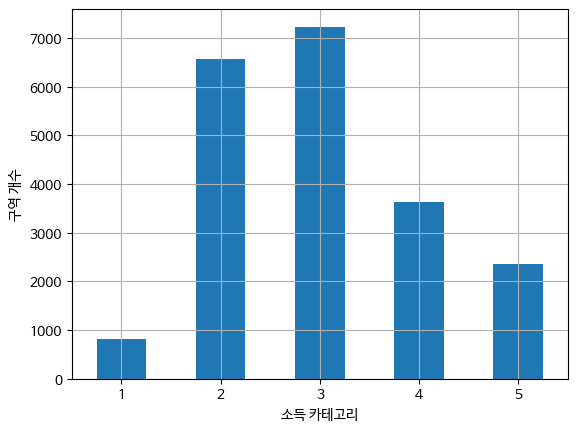

In [ ]:
housing['income_cat'].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel('소득 카테고리')
plt.ylabel('구역 개수')
plt.show()

In [ ]:
#split method 활용하여 한번더
from sklearn.model_selection import StratifiedShuffleSplit
splitter = StratifiedShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing['income_cat']) :
  strat_train_set_n = housing.iloc[train_index]
  strat_test_set_n  = housing.iloc[test_index]
  strat_splits.append([strat_train_set_n, strat_test_set_n])

In [ ]:
strat_train_set, strat_test_set = strat_splits[0]

In [ ]:
#샘플링 편향 비교
strat_test_set['income_cat'].value_counts() / len(strat_test_set) #stratify사용 여부(계층랜덤이냐 전체랜덤이냐)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

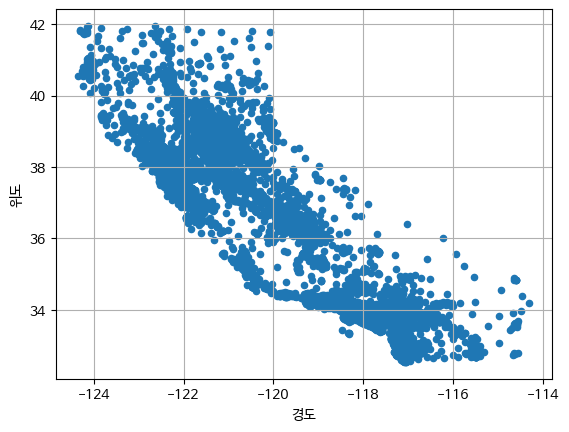

In [ ]:
#지리적 데이터 시각화하기(위,경도 포함)
housing.plot(kind='scatter',x='longitude',y='latitude',grid=True) #산점도(어떤 plot 할 건지), x,y축은 뭐 할 건지 결정. grid는 격자선 표시 여부
plt.xlabel("경도")
plt.ylabel("위도")
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

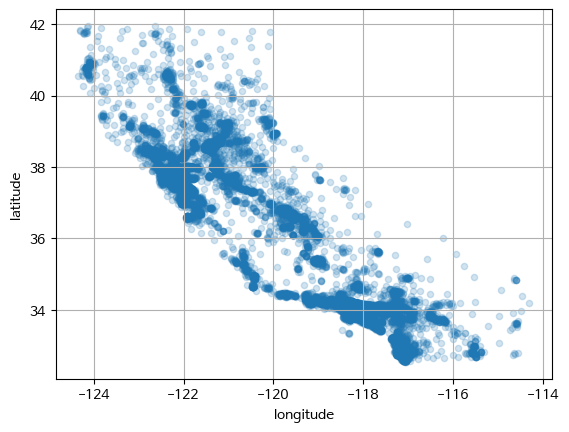

In [ ]:
#alpha = 투명도. 0에 가까울수록 투명하고 1에 가까울수록 진하다
housing.plot(kind='scatter',x='longitude',y='latitude',grid=True, alpha=0.2)
#겹칠수록 진해지게 표시할 수 있다.

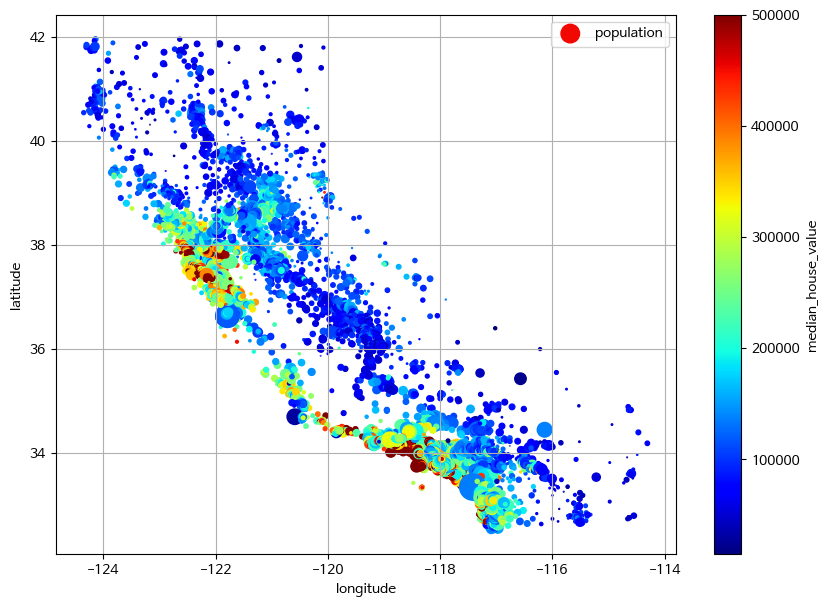

In [ ]:
#주택 가격 시각화
housing.plot(kind='scatter',x='longitude',y='latitude',grid=True,s =housing['population']/100, label='population',c='median_house_value',cmap='jet',colorbar=True,legend=True,sharex=False, figsize=(10,7))
plt.show()
#cmap='jet' : 그라데이션이 있어 빨간색일수록 높고 파란색일수록 가격이 싸다고 해석할 수 있다(jet이라는 게 범위를 가지는 것)

In [ ]:
#상관관계 조사
corr_matrix = housing.corr(numeric_only = True) #학습 데이터에 있는 항목들끼리 상관계수를 계산해서 matrix 형식으로 보여줘. 근데 이제 numeric_only면 수치형 column에 대해서만 진행하게 됨.
corr_matrix['median_house_value'].sort_values(ascending=False) #중간주택가격을 찾아보기 위해 특정 컬럼에 대한 상관계수만 도출


median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

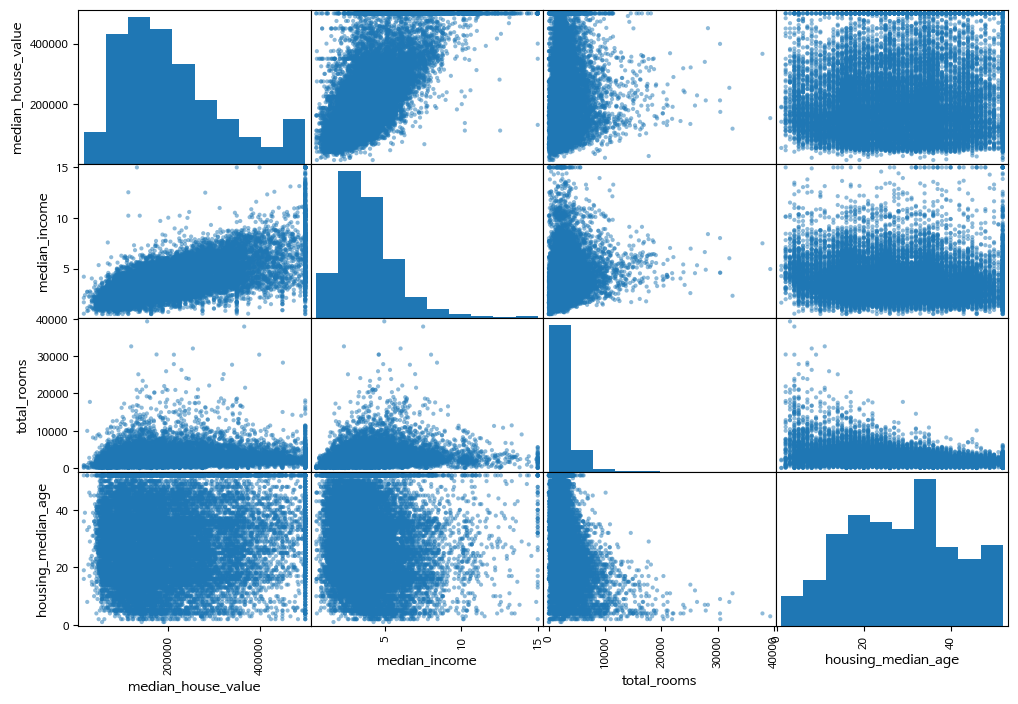

In [ ]:
#scatter_matrix 그리기 : 상관관계(column 간 산점도 시각화)
from pandas.plotting import scatter_matrix
attributes=['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attributes],figsize=(12,8))
plt.show()

In [ ]:
#특성의 조합으로 실험하기 : 조합하여 새로운 특성을 만들어보자.
housing['rooms_per_house'] = housing['total_rooms']/housing['households'] #가구당 방 수
housing['bedrooms_ratio'] = housing['total_bedrooms']/housing['total_rooms'] #방 수 중 침실 비율
housing['population_per_house'] = housing['population']/housing['households'] #가구당 인구 수

In [ ]:
corr_matrix = housing.corr(numeric_only = True)
#corr_matrix.sort_values(ascending=False) #안됨. 뭘 기준으로 할 건지 명시해야 함
corr_matrix['median_house_value'].sort_values(ascending=False)


median_house_value      1.000000
median_income           0.688075
rooms_per_house         0.151948
total_rooms             0.134153
housing_median_age      0.105623
households              0.065843
total_bedrooms          0.049686
population_per_house   -0.023737
population             -0.024650
longitude              -0.045967
latitude               -0.144160
bedrooms_ratio         -0.255880
Name: median_house_value, dtype: float64

In [ ]:
housing = strat_train_set.drop('median_house_value',axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [ ]:
#data 자동화 : 재사용 가능한 라이브러리 점진적으로 구축 가능, 어떤 조합이 가장 좋은지 확인할 수 있으며 다른 데이터셋에 대해서도 데이터 변환 등을 어렵지 않게 반복할 수 있다.
#housing_labels = housing.drop('median_house_value',axis=1) #열을 없앤다면 1. 가로를 없앤다면 0이다. 가로세로, 0,1 이렇게 외웁시다.

#housing.dropna(subset=['total_bedrooms'],inplace=True) #해당 구역(결측치인 영역) 제거

#housing.drop('total_bedrooms',axis=1,inplace=True) #그냥 특성 전체를 없애버린 것

median=housing['total_bedrooms'].median() #중앙값 등으로 대체
housing['total_bedrooms'].fillna(median, inplace=True) #바로 적용해주세요(inplace=True)



In [ ]:
#scikit-learn에도 유사한 게 있음
#simpleimputer class : 각 특성의 중간값을 저장하고 있는 클래스다. 알아서 median을 계산하여 나머지 채워넣음
from sklearn.impute import SimpleImpute
imputer = SimpleImputer(strategy='median') #

#수치 특성만 가진 데이터 복사본을 생성
housing_num =housing.select_dtypes(include=[np.number])
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_ #자동으로 계산한 median 값들을 statistics 속성에 저장해둔다.

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11900000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54155000e+00,
        5.23234164e+00,  2.03027043e-01,  2.81766108e+00])

In [ ]:
housing_num.median().values #위 imputer_statistics와 일치하는 것을 확인할 수 있다.

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11900000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54155000e+00,
        5.23234164e+00,  2.03027043e-01,  2.81766108e+00])

In [ ]:
X = imputer.transform(housing_num) #numpy 배열 형태로 출력된다. 때문에 X를 데이터프레임으로 감싸 housing_num으로부터 열 이름과 인덱스 복원
housing_tr = pd.DataFrame(X,columns = housing_num.columns, index = housing_num.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_house,bedrooms_ratio,population_per_house
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,6.096552,0.182692,3.167241
...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,6.658342,0.184696,2.023976
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,5.571932,0.179977,3.363188
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,4.110465,0.234795,2.662791
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,6.297405,0.183835,2.411178
